In [40]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.decomposition import TruncatedSVD

In [3]:
df = pd.read_csv("ratings_Beauty.csv")
df.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [4]:
df.shape

(2023070, 4)

In [5]:
df.dtypes

UserId        object
ProductId     object
Rating       float64
Timestamp      int64
dtype: object

In [9]:
maxrate_products = df.groupby("ProductId").count()['Rating'].reset_index()
maxrate_products

,ProductId,Rating
0,0205616461,1
1,0558925278,2
2,0733001998,1
3,0737104473,1
4,0762451459,1
...,...,...
249269,B00LORWRJA,1
249270,B00LOS7MEE,1
249271,B00LP2YB8E,1
249272,B00LPVG6V0,1


In [15]:
sort_products = maxrate_products.sort_values('Rating', ascending = False)
sort_products

,ProductId,Rating
65766,B001MA0QY2,7533
10516,B0009V1YR8,2869
110873,B0043OYFKU,2477
2365,B0000YUXI0,2143
105018,B003V265QW,2088
...,...,...
128402,B004U81OBC,1
128397,B004U7R0EI,1
128393,B004U7Q2O2,1
128390,B004U7NKRE,1


<AxesSubplot:>

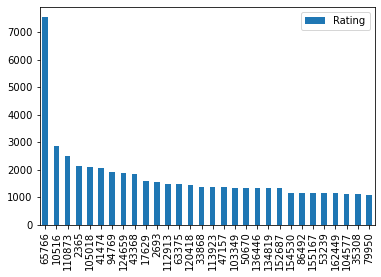

In [23]:
sort_products.head(30).plot(kind = "bar")

<AxesSubplot:>

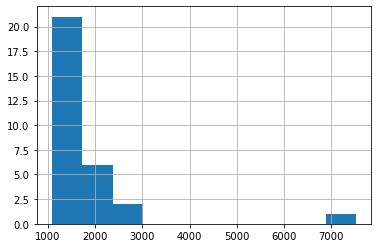

In [48]:
sort_products.head(30)['Rating'].hist()

## Collaborative filtering

Recommend items to users based on purchase history and similarity of ratings provided by other users who bought items to that of a particular customer.
A model based collaborative filtering technique is closen here as it helps in making predictinfg products for a particular user by identifying patterns based on preferences from multiple user data.

In [31]:
ratings_utility_matrix = df.head(10000).pivot_table(values='Rating', index='ProductId', columns='UserId', fill_value=0)
ratings_utility_matrix

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B000052YPU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B000052YPV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B000052YPY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
##Decomposing Matrix

In [35]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(ratings_utility_matrix)
decomposed_matrix.shape

(886, 10)

In [38]:
decomposed_matrix

array([[-5.50883627e-15,  3.03656915e-14,  1.90835548e-13, ...,
         5.00435734e-15,  1.14703443e-12, -1.02932413e-11],
       [ 2.63014645e-14,  1.30679079e-13,  8.15009458e-13, ...,
        -6.98358471e-12,  2.68027395e-12, -3.99135339e-11],
       [-3.69986794e-17, -1.24160794e-15,  9.25751707e-15, ...,
        -1.06569173e-14, -4.16043435e-15, -8.80554925e-13],
       ...,
       [ 3.23932982e-06,  2.27949761e-01, -1.04132911e-02, ...,
        -3.71245980e-03, -1.06503885e-04, -4.90945986e-02],
       [ 1.94917000e-06,  8.15726213e-04,  1.75835040e-05, ...,
        -6.18014907e-04,  1.17411658e-03, -6.26083133e-03],
       [-5.50202311e-04,  4.16859318e-01,  3.58933644e-01, ...,
        -4.87149302e-02, -9.91935884e-02,  1.11418382e+00]])

In [37]:
##Correlation Matrix

In [41]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix

array([[ 1.        ,  0.97069463,  0.99364331, ...,  0.30103576,
         0.86549959, -0.64444619],
       [ 0.97069463,  1.        ,  0.97130287, ...,  0.30325808,
         0.88281441, -0.52359027],
       [ 0.99364331,  0.97130287,  1.        , ...,  0.31652738,
         0.8528778 , -0.62551865],
       ...,
       [ 0.30103576,  0.30325808,  0.31652738, ...,  1.        ,
         0.30244344, -0.08978132],
       [ 0.86549959,  0.88281441,  0.8528778 , ...,  0.30244344,
         1.        , -0.23056777],
       [-0.64444619, -0.52359027, -0.62551865, ..., -0.08978132,
        -0.23056777,  1.        ]])

In [42]:
i = "B000052YPV"      #Product_id

product_names = list(ratings_utility_matrix.index)
product_ID = product_names.index(i)
product_ID

882

In [43]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

In [47]:
Recommend = list(ratings_utility_matrix.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:9]

['130414089X',
 '1929099886',
 '6117043058',
 '6169040335',
 '7899120217',
 '8329000710',
 '951311290X',
 '9601403787',
 '9628982370']

Product Id # Here are the top 10 products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the website.